In [ ]:
""" 
This Program is built to extract the sentiment of a movie using the reviews that exist for it within IMDB
"""

In [1]:
import imdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# creating an instance of the IMDB()
ia = imdb.IMDb()

In [21]:
# Search movie name. Use the ID from the result in the following code blocks to analyze sentiment
name = "lord of the rings"
search = ia.search_movie(name)
print(search)

[<Movie id:7631058[http] title:_"The Lord of the Rings: The Rings of Power" (2022)_>, <Movie id:0120737[http] title:_The Lord of the Rings: The Fellowship of the Ring (2001)_>, <Movie id:0167260[http] title:_The Lord of the Rings: The Return of the King (2003)_>, <Movie id:0167261[http] title:_The Lord of the Rings: The Two Towers (2002)_>, <Movie id:14824600[http] title:_The Lord of the Rings: The War of the Rohirrim (2024)_>, <Movie id:0077869[http] title:_The Lord of the Rings (1978)_>, <Movie id:32328070[http] title:_The Lord of the Rings: The Hunt for Gollum (2026)_>, <Movie id:22541972[http] title:_The Official The Lord of the Rings: The Rings of Power Podcast (2022)_>, <Movie id:21811588[http] title:_The Lord of the Rings: The Fellowship of the Ring - Special Extended Edition Scenes (2002) (V)_>, <Movie id:0302751[http] title:_The Making of 'The Lord of the Rings' (2002) (V)_>, <Movie id:21811594[http] title:_The Lord of the Rings: The Two Towers - Special Extended Edition Scene

In [23]:
# Pulling the selected movie reviews data into pandas dataframe
moviedata = ia.get_movie('0120737',['reviews'])
df_reviews = pd.DataFrame(moviedata['reviews'])
df_reviews.head()

,content,helpful,title,author,date,rating,not_helpful
0,Simply incredible. Never before have I seen a ...,399,An absolutely incredible film!,ur1099595,2 May 2002,10.0,21
1,(95%) If the late 70's early 80's had the Star...,52,Thank you Mr Jackson,ur54757473,11 November 2014,10.0,1
2,The first part of the Lord of the Rings trilog...,248,"The Fellowship of the Ring: Not just a Movie, ...",ur5890870,14 April 2006,10.0,18
3,An incredible feat Enthrals anew every time Ca...,101,How the hell did they film this thing,ur90265605,7 March 2021,10.0,7
4,Breathtaking. Unique. Captivating. Enchanting....,362,Wow!,ur0510715,11 December 2001,NaN,41


In [24]:
# Checking for missing values
print(df_reviews.isnull().sum())

content        0
helpful        0
title          0
author         0
date           0
rating         2
not_helpful    0
dtype: int64


In [25]:
# Dropping rows with NULLs
df_reviews_nonas = df_reviews.dropna()
df_reviews_nonas.head()

,content,helpful,title,author,date,rating,not_helpful
0,Simply incredible. Never before have I seen a ...,399,An absolutely incredible film!,ur1099595,2 May 2002,10.0,21
1,(95%) If the late 70's early 80's had the Star...,52,Thank you Mr Jackson,ur54757473,11 November 2014,10.0,1
2,The first part of the Lord of the Rings trilog...,248,"The Fellowship of the Ring: Not just a Movie, ...",ur5890870,14 April 2006,10.0,18
3,An incredible feat Enthrals anew every time Ca...,101,How the hell did they film this thing,ur90265605,7 March 2021,10.0,7
5,"Here is one film that lived up to its hype, an...",269,"First, And Still The Best Of LOTR",ur4445210,7 March 2006,10.0,29


In [26]:
# Cleaning and preparing the column that contains the IMDB reviews 
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_reviews_nonas["content"] = df_reviews_nonas["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhimeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/3c/bb6fcvtx5rj20nlp4vztvcjw0000gn/T/ipykernel_5015/49190455.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_nonas["content"] = df_reviews_nonas["content"].apply(clean)


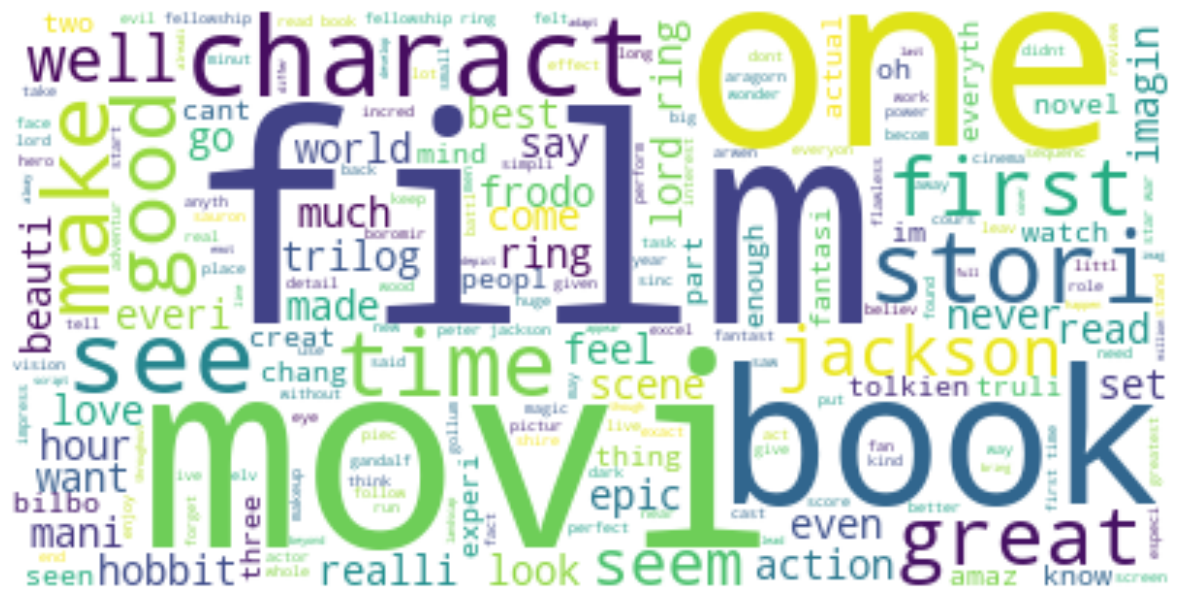

In [27]:
# Visualizing the type of reviews that users are leaving for the movie.
text = " ".join(i for i in df_reviews_nonas.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Analyzing the sentiment scores of the reviews 
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df_reviews_nonas["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_reviews_nonas["content"]]
df_reviews_nonas["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_reviews_nonas["content"]]
df_reviews_nonas["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_reviews_nonas["content"]]
df_reviews_nonas = df_reviews_nonas[["author","rating","content", "Positive", "Negative", "Neutral"]]
print(df_reviews_nonas.head())

       author  rating                                            content  \
0   ur1099595    10.0  simpli incred never seen  hour movi didnt seem...   
1  ur54757473    10.0   late  earli  star war trilog  epic fantasi ma...   
2   ur5890870    10.0  first part lord ring trilog fellowship ring op...   
3  ur90265605    10.0  incred feat enthral anew everi time cannot bel...   
5   ur4445210    10.0  one film live hype time saw arriv video store ...   

   Positive  Negative  Neutral  
0     0.208     0.054    0.738  
1     0.254     0.071    0.674  
2     0.166     0.053    0.781  
3     0.337     0.000    0.663  
5     0.209     0.028    0.763  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dhimeg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/3c/bb6fcvtx5rj20nlp4vztvcjw0000gn/T/ipykernel_5015/3838483676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_nonas["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_reviews_nonas["content"]]
/var/folders/3c/bb6fcvtx5rj20nlp4vztvcjw0000gn/T/ipykernel_5015/3838483676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [29]:
# Aggregating the scores to see what the reviewers think of the movie
x = sum(df_reviews_nonas["Positive"])
y = sum(df_reviews_nonas["Negative"])
z = sum(df_reviews_nonas["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [30]:
# The total of Positive, Negative, and Neutral sentiment scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  4.5249999999999995
Negative:  1.4540000000000002
Neutral:  17.02
